In [1]:
# Data set comes from kaggle's "Predict Diabetes - Analyze Diabetes Database" 
# Code largely obtained from a tensorflow tutorial
# Import libraries
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [3]:
# Load data, but skip the header
dataset = loadtxt('diabetes.csv', delimiter=',', skiprows=1)

In [4]:
# The first 8 columns are the features and the last column is the label
# I'm going to save the first 10 datums for validating the model
X_training = dataset[10:, 0:8]
y_training = dataset[10:, 8]

In [5]:
# Define the network
neural_network = Sequential()
neural_network.add(Dense(12, input_shape=(8,), activation='relu'))
neural_network.add(Dense(8, activation='relu'))
neural_network.add(Dense(1, activation='sigmoid'))

2024-01-22 18:43:45.792468: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Add some other parameters to the network
neural_network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Train the network
history = neural_network.fit(X_training, y_training, epochs=150, batch_size=10)

2024-01-22 18:44:12.431479: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150
76/76 [==============================] - 0s 741us/step - loss: 2.6695 - accuracy: 0.6016
Epoch 2/150
76/76 [==============================] - 0s 611us/step - loss: 1.1337 - accuracy: 0.6464
Epoch 3/150
76/76 [==============================] - 0s 617us/step - loss: 0.8312 - accuracy: 0.6293
Epoch 4/150
76/76 [==============================] - 0s 602us/step - loss: 0.7070 - accuracy: 0.6504
Epoch 5/150
76/76 [==============================] - 0s 598us/step - loss: 0.6843 - accuracy: 0.6609
Epoch 6/150
76/76 [==============================] - 0s 689us/step - loss: 0.6764 - accuracy: 0.6596
Epoch 7/150
76/76 [==============================] - 0s 659us/step - loss: 0.6606 - accuracy: 0.6662
Epoch 8/150
76/76 [==============================] - 0s 607us/step - loss: 0.6515 - accuracy: 0.6689
Epoch 9/150
76/76 [==============================] - 0s 595us/step - loss: 0.6410 - accuracy: 0.6675
Epoch 10/150
76/76 [==============================] - 0s 980us/step - loss: 0.6404 - accura

Text(0.5, 0, 'epoch')

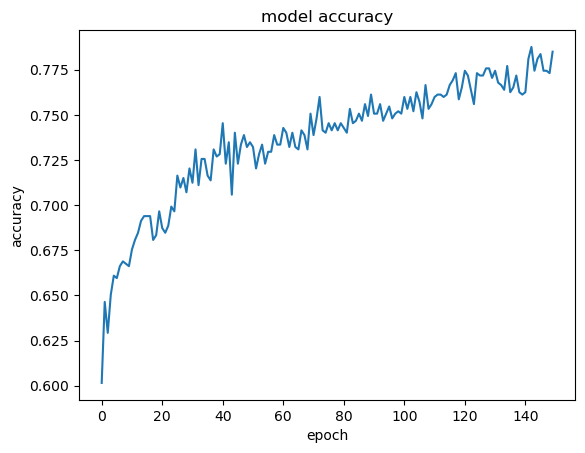

In [8]:
# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [10]:
# Test it out
X_validate = dataset[:10,:8]
y_validate = dataset[:10,8]
# make class predictions with the model
predictions = (neural_network.predict(X_validate) > 0.5).astype(int)
# List out the results from our 10 saved datums
for i in range(10):
 print('%s => %d (expected %d)' % (X_validate[i].tolist(), predictions[i], y_validate[i]))
 

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] => 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] => 0 (expected 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] => 1 (expected 0)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] => 0 (expected 1)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] => 0 (expected 1)


In [12]:
from tensorflow.keras.utils import plot_model
plot_model(neural_network, show_shapes=True, show_layer_names=True)


('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
